<a href="https://colab.research.google.com/github/Neuralnomad-hub/Machine-Learninng-Algorithms-implemented-in-datasets/blob/main/code_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we are going to implement decision tree a;lgorithm into a classification dataset Titanic

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [77]:
import seaborn as sns
df= sns.load_dataset('titanic')
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [78]:
import pandas as pd
pd.set_option('display.max_columns', None)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [79]:
#lets preprcess the the dataset first to the sex column by label encodig
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
print(df.head())

   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.7+ KB


In [81]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Based on the output from df.isnull().sum(), we know:

'age' has 177 missing values.
'embarked' has 2 missing values.
'deck' has 688 missing values (a significant amount).
For the 'age' column, a common strategy is to fill missing values with the mean or median of the column. The mean is sensitive to outliers, while the median is more robust. Let's use the mean for now.

For the 'embarked' column, since it's a categorical column and only has a few missing values, we can fill them with the mode (the most frequent value).

For the 'deck' column, with such a high percentage of missing values, it might be best to drop this column entirely as it might not provide useful information and could even introduce noise.

In [82]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


/tmp/ipython-input-3840250118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-3840250118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [83]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

/tmp/ipython-input-751922478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)


In [84]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [85]:
#now only thing remained is preprocessing categorical columns
df['who']= le.fit_transform(df['who'])
df['adult_male']= le.fit_transform(df['adult_male'])
df['alive']= le.fit_transform(df['alive'])
df['alone']= le.fit_transform(df['alone'])
print(df.head())

   survived  pclass  sex   age  sibsp  parch     fare embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    1   
1         1       1    0  38.0      1      0  71.2833        C  First    2   
2         1       3    0  26.0      0      0   7.9250        S  Third    2   
3         1       1    0  35.0      1      0  53.1000        S  First    2   
4         0       3    1  35.0      0      0   8.0500        S  Third    1   

   adult_male deck  embark_town  alive  alone  
0           1  NaN  Southampton      0      0  
1           0    C    Cherbourg      1      0  
2           0  NaN  Southampton      1      1  
3           0    C  Southampton      1      0  
4           1  NaN  Southampton      0      1  


In [86]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,1,1,NaN,Southampton,0,0
1,1,1,0,38.0,1,0,71.2833,C,First,2,0,C,Cherbourg,1,0
2,1,3,0,26.0,0,0,7.9250,S,Third,2,0,NaN,Southampton,1,1
3,1,1,0,35.0,1,0,53.1000,S,First,2,0,C,Southampton,1,0
4,0,3,1,35.0,0,0,8.0500,S,Third,1,1,NaN,Southampton,0,1


In [87]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,1,27.0,0,0,13.00,S,Second,1,1,NaN,Southampton,0,1
887,1,1,0,19.0,0,0,30.00,S,First,2,0,B,Southampton,1,1
888,0,3,0,28.0,1,2,23.45,S,Third,2,0,NaN,Southampton,0,0
889,1,1,1,26.0,0,0,30.00,C,First,1,1,C,Cherbourg,1,1
890,0,3,1,32.0,0,0,7.75,Q,Third,1,1,NaN,Queenstown,0,1


In [88]:
#based on this categorical data we gonna do one hot encoding on embark_town,class,embarked
df= pd.get_dummies(df,columns=['embark_town','class','embarked'])
print(df.head())

   survived  pclass  sex   age  sibsp  parch     fare  who  adult_male deck  \
0         0       3    1  22.0      1      0   7.2500    1           1  NaN   
1         1       1    0  38.0      1      0  71.2833    2           0    C   
2         1       3    0  26.0      0      0   7.9250    2           0  NaN   
3         1       1    0  35.0      1      0  53.1000    2           0    C   
4         0       3    1  35.0      0      0   8.0500    1           1  NaN   

   alive  alone  embark_town_Cherbourg  embark_town_Queenstown  \
0      0      0                  False                   False   
1      1      0                   True                   False   
2      1      1                  False                   False   
3      1      0                  False                   False   
4      0      1                  False                   False   

   embark_town_Southampton  class_First  class_Second  class_Third  \
0                     True        False         False     

In [89]:
categorical_cols = ['embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton',
                    'class_First', 'class_Second', 'class_Third', 'embarked_C', 'embarked_Q', 'embarked_S']
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
#now ther dataset is preprocessed now we gonna train,test and the apply algorithm in the dataset for prediction of survived
from sklearn.model_selection import train_test_split
x=df.drop(['survived'],axis= 1)
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print(predict)

In [91]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Now we see that overfitting has occured now we gonna tune algorithms hyperparameters

In [94]:
model1=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, min_samples_leaf=2)
x=df.drop(['survived','deck'],axis= 1)
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model1.fit(x_train,y_train)
predict1=model1.predict(x_test)
print(predict1)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


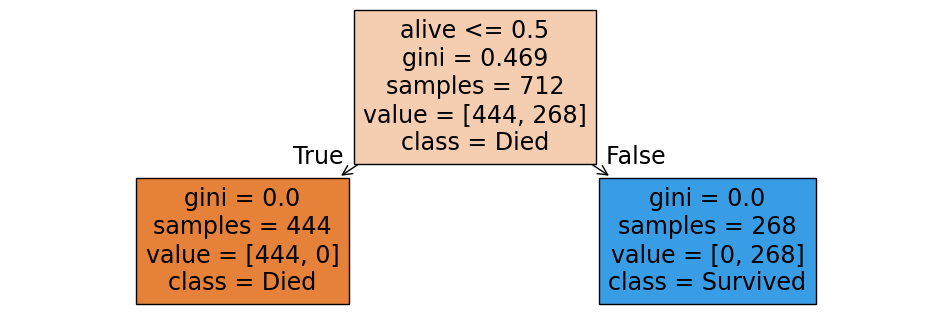

In [95]:
plt.figure(figsize=(12,4))
plot_tree(model1, feature_names=x.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()


In [96]:
print(classification_report(y_test, predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [117]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': ccp_alphas
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
x=df.drop(['survived', 'deck'],axis= 1) # Include family_size in x
y=df['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'ccp_alpha': np.float64(0.0), 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 1.0


In [101]:
model2=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=2)
model2.fit(x_train,y_train)
predict2=model2.predict(x_test)
print(predict2)
print(classification_report(y_test,predict2))

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



This methood didnt work better so we gonna use pruning to overcome overfitting of the model

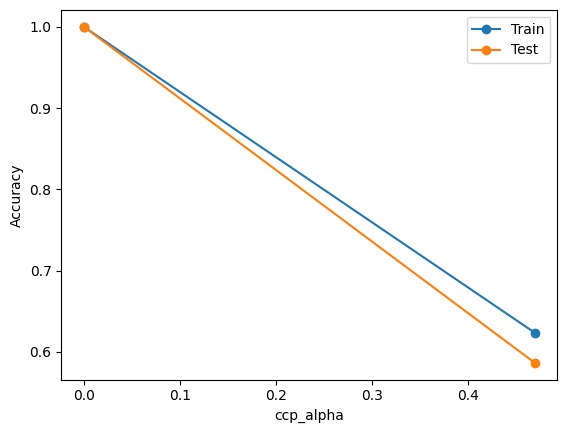

In [104]:
path = model2.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
#Try different alpha values
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    model3 = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model3.fit(x_train, y_train)
    train_scores.append(model3.score(x_train, y_train))
    test_scores.append(model3.score(x_test, y_test))
# 4. Plot effect
plt.plot(ccp_alphas, train_scores, marker='o', label='Train')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
model_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
model_pruned.fit(x_train, y_train)
predict_pruned = model_pruned.predict(x_test)
print(classification_report(y_test, predict_pruned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [109]:
# Display descriptive statistics for numerical features
display(df.describe())

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.210999,0.602694,0.383838,0.602694,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.594291,0.489615,0.486592,0.489615,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


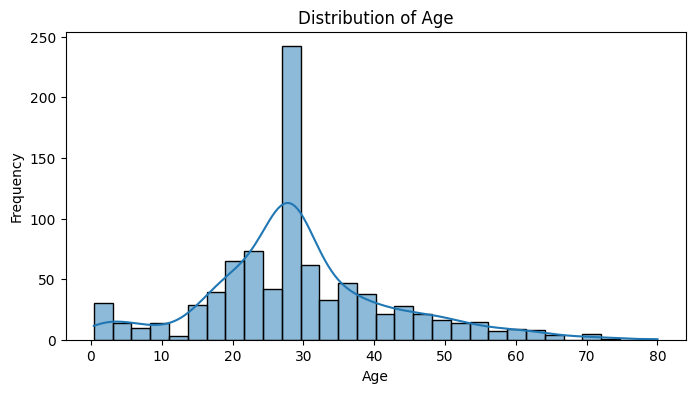

In [111]:
# Visualize the distribution of 'age'
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

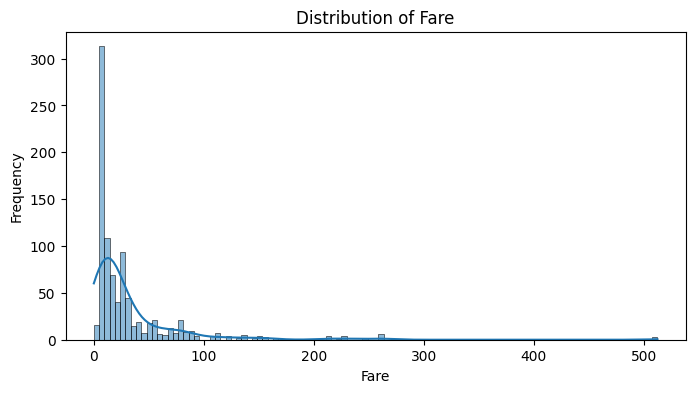

In [112]:
# Visualize the distribution of 'fare'
plt.figure(figsize=(8, 4))
sns.histplot(df['fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

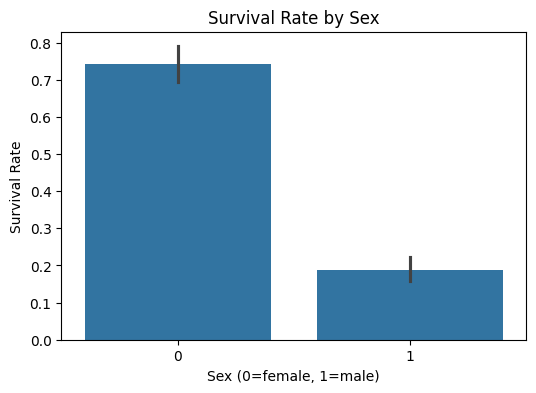

In [113]:
# Visualize the relationship between 'survived' and 'sex'
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0=female, 1=male)')
plt.ylabel('Survival Rate')
plt.show()

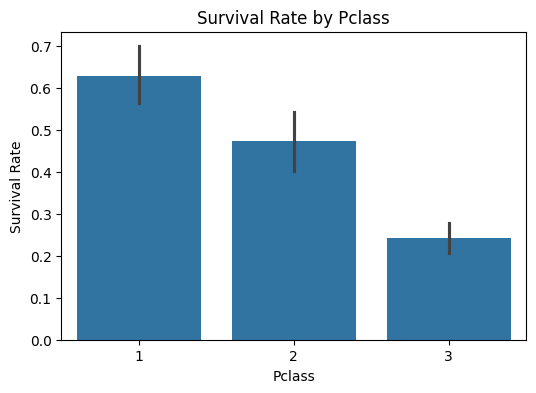

In [114]:
# Visualize the relationship between 'survived' and 'pclass'
plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

In [116]:
df['family_size'] = df['sibsp'] + df['parch'] + 1 # Adding 1 for the passenger themselves
display(df[['sibsp', 'parch', 'family_size']].head())

,sibsp,parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [118]:
best_model_with_family = DecisionTreeClassifier(**grid.best_params_, random_state=42)
best_model_with_family.fit(x_train, y_train)
predict_best_with_family = best_model_with_family.predict(x_test)
print(classification_report(y_test, predict_best_with_family))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



we tried evry possible scenario here to avoid overfitting such as hyperparameter tuning,post pruning the tress, finding out potential noise and alsocombing 2 features to examine the learning or intersting insights but yet failed t avoid overfitting..so the best possible solution is to use other algorithm such as Randomforest algorithm which is great at pruning less important branches  